# Lab 12 - Imbalance

## Round 1

Import the required libraries and modules that you would need.

    • Read that data into Python and call the dataframe churnData.

    • Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

    • Check for null values in the dataframe. Replace the null values.

    • Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

        o Split the data into a training set and a test set.

        o Scale the features either by using MinMaxScaler or a standard scaler.
        
    • (Optional) Encode the categorical variables so you can use them for modeling later. 

### Import Libraries 

In [96]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score



### Import and check Dataset

In [51]:
churnData=pd.read_csv('DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [52]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [53]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

### Convert TotalCharges to numeric

In [54]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [61]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [55]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Fill null values

In [56]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [57]:
missingTotalCharges = churnData.loc[churnData['TotalCharges'].isna()]
missingTotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [58]:
# I first tried to replace missing values through KNN

# Perform K Nearest Neighbors imputation to fill NaN values
# imputer = KNNImputer(n_neighbors=5)
# churnData['TotalCharges'] = imputer.fit_transform(churnData[['TotalCharges']])

In [62]:
imputedLines = churnData.loc[missingTotalCharges.index]
imputedLines


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,2283.300441,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,2283.300441,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,2283.300441,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,2283.300441,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,2283.300441,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,2283.300441,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,2283.300441,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,2283.300441,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,2283.300441,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,2283.300441,No


In [71]:
# I noticed when printing the imputed lines that they all had a tenure
# (i.e. total customer life time since subscription) of 0 month.
# they should then be replaced with 0 rather than with a KNN imputer

#churnData.loc[missingTotalCharges.index]['TotalCharges'] = 0
#churnData.loc[missingTotalCharges.index]['TotalCharges']

churnData.loc[missingTotalCharges.index, 'TotalCharges'] = 0

churnData.loc[missingTotalCharges.index]['TotalCharges']


488     0.0
753     0.0
936     0.0
1082    0.0
1340    0.0
3331    0.0
3826    0.0
4380    0.0
5218    0.0
6670    0.0
6754    0.0
Name: TotalCharges, dtype: float64

### Encode Categorical Columns

In [81]:
# Check categorical columns

object_columns = churnData.select_dtypes(include='object').columns.tolist()

# Displaying the list of columns with 'object' data type
print(object_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'Churn']


In [93]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [94]:
# Categorical columns to encode using get_dummies
columns_get_dummies = ['gender', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

# Columns to encode as 1/0
columns_yn = ['Partner', 'Dependents', 'PhoneService', 'Churn']

# One-hot encoding for get_dummies columns:
encoded_data = pd.get_dummies(churnData, columns=columns_get_dummies)

# Convert Yes/No values to 1/0:
encoded_data[columns_yn] = encoded_data[columns_yn].replace({'Yes': 1, 'No': 0})

In [95]:
encoded_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,29.85,29.85,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,34,1,56.95,1889.50,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,2,1,53.85,108.15,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,45,0,42.30,1840.75,0,0,1,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,2,1,70.70,151.65,1,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,0,1,...,1,0,0,1,0,0,1,0,1,0
7039,0,1,1,72,1,103.20,7362.90,0,1,0,...,0,0,0,1,0,0,1,0,1,0
7040,0,1,1,11,0,29.60,346.45,0,1,0,...,0,1,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,74.40,306.60,1,0,1,...,0,1,0,0,1,0,0,1,0,0


### Feature Selection, Train-Test split and Scaling

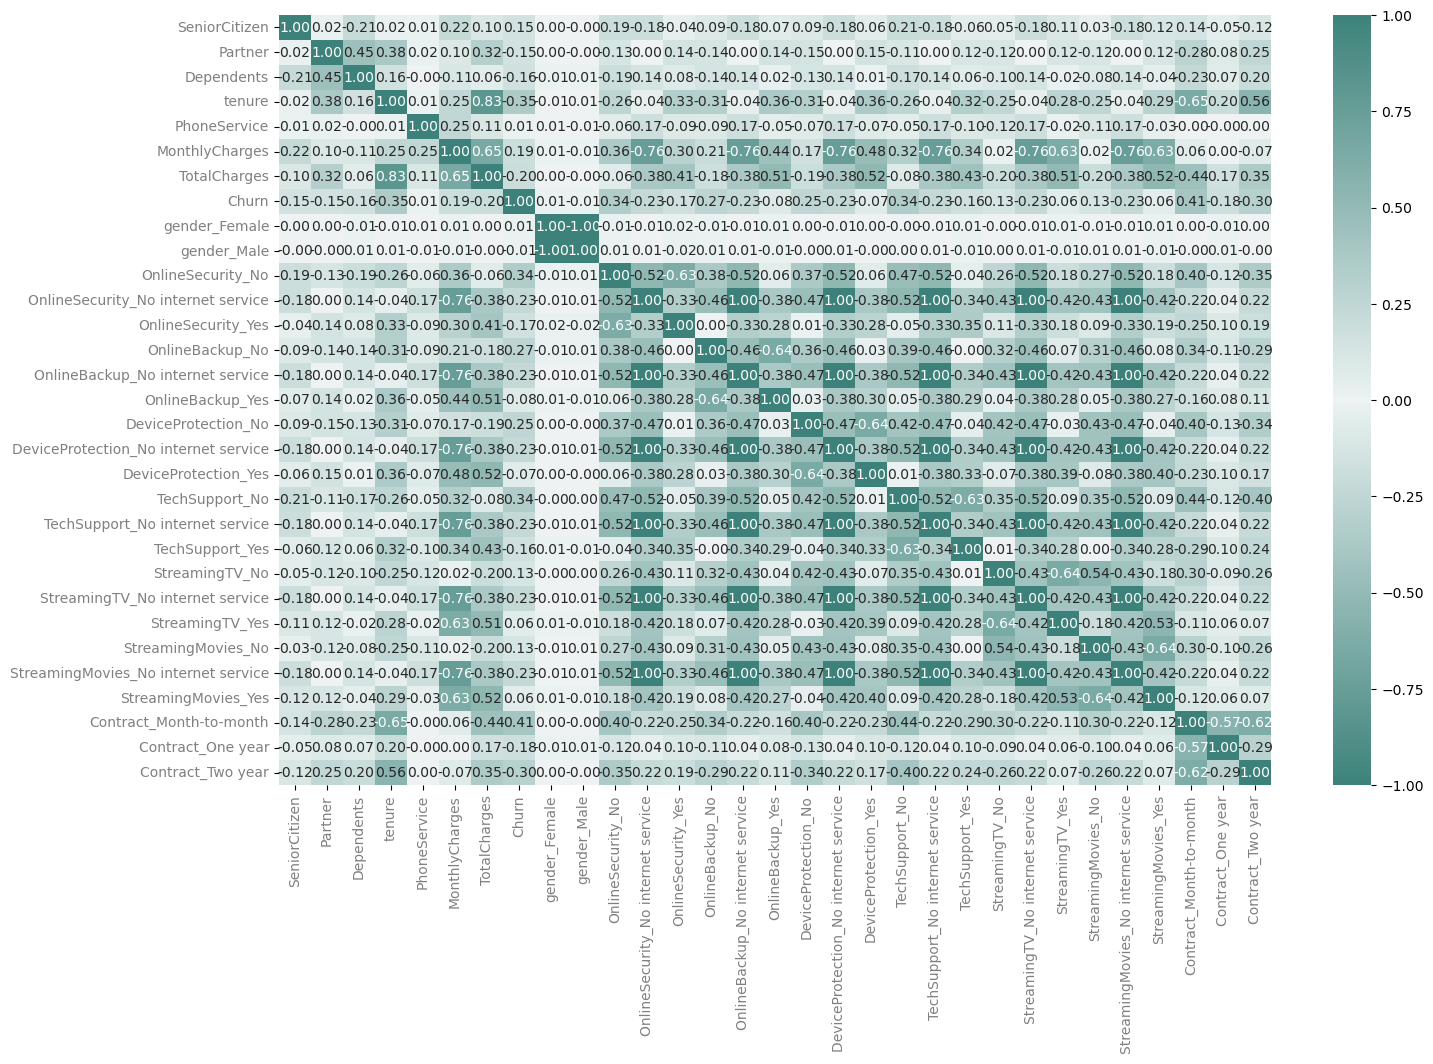

In [105]:
correlations_matrix = encoded_data.corr()
fig, ax = plt.subplots(figsize=(16, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 180, as_cmap=True)
g = sns.heatmap(correlations_matrix, fmt=".2f", cmap=cmap, annot=True)
for tick_label in g.axes.get_yticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
for tick_label in g.axes.get_xticklabels():
    tick_label.set_color("grey")
    tick_label.set_fontsize("10")
plt.show()

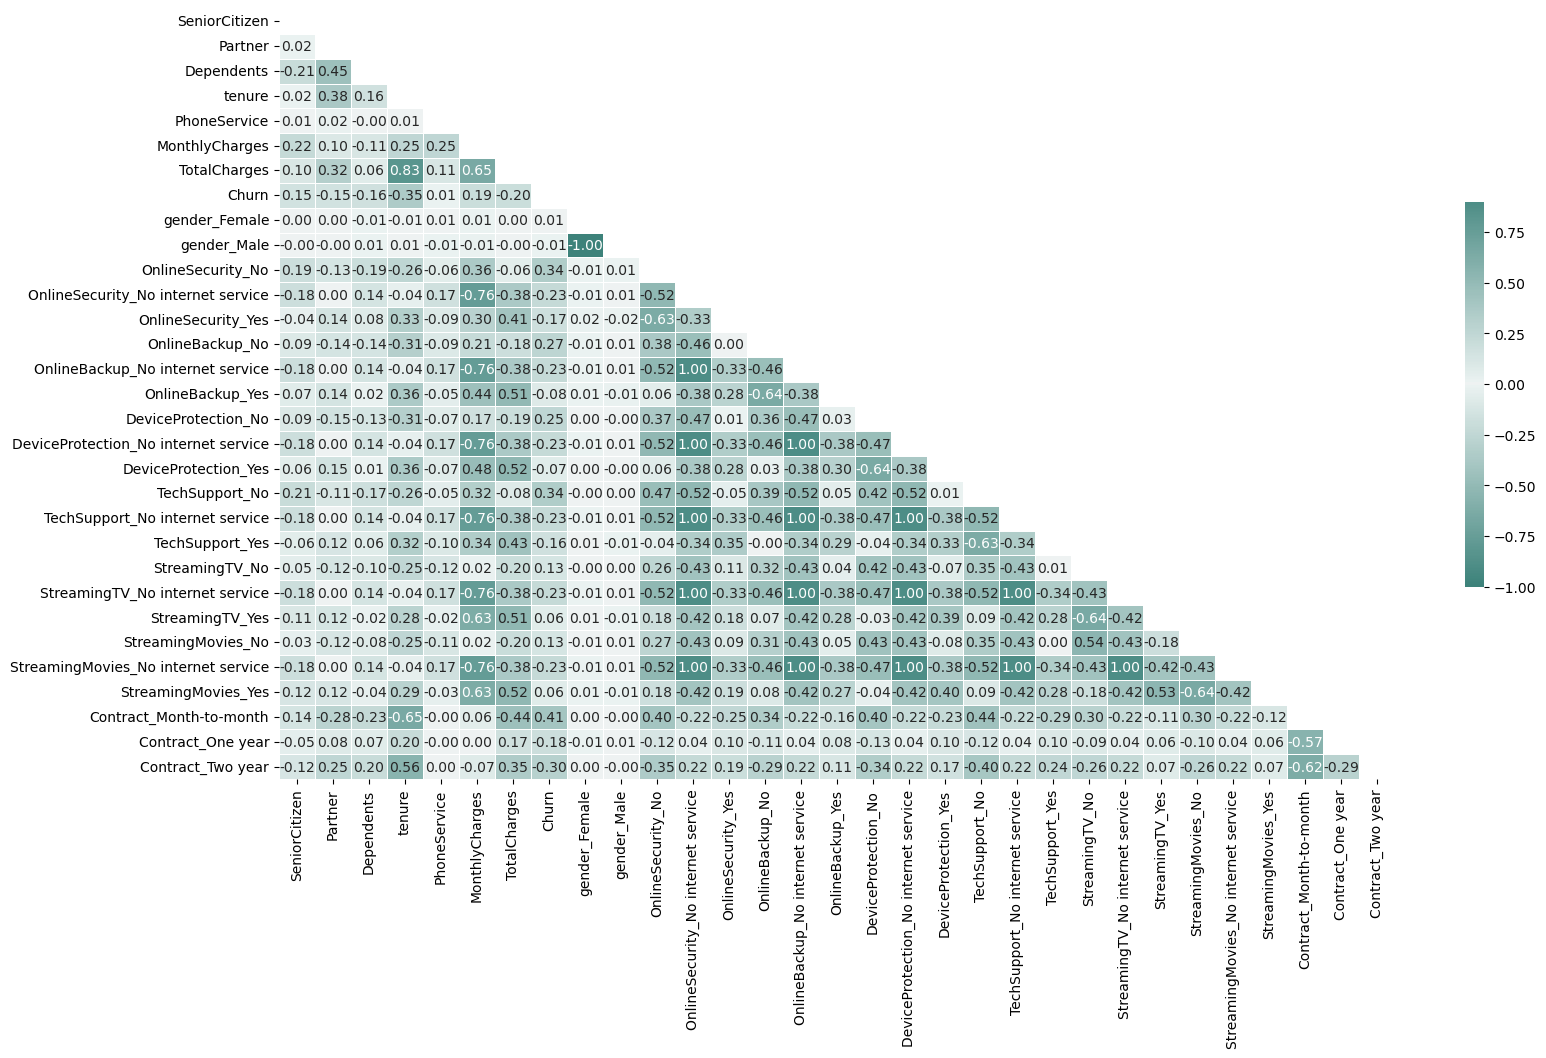

In [114]:
mask = np.zeros_like(correlations_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 180, as_cmap=True)
# 180° = cyan on the hue color wheel, cf https://www.learnui.design/blog/the-hsb-color-system-practicioners-primer.html

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(correlations_matrix, mask=mask, fmt=".2f", cmap=cmap, vmax=.9, center=0,
        linewidths=.5, cbar_kws={"shrink": .5}, annot=True) #square=True, 
# save to file
fig = sns_plot.get_figure()
fig.savefig("features_heatmap.png")

In [112]:
encoded_data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year'],
      dtype='object')

In [113]:
#100% Multicollinearity between all "No internet service" columns, so we will keep only 'OnlineSecurity_No internet service',
# and drop other ones

columns_to_drop = ['OnlineBackup_No internet service', 'DeviceProtection_No internet service',
'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']
encoded_data.drop(columns=columns_to_drop, inplace=True)
encoded_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,1,0,29.85,29.85,0,1,0,...,0,1,0,1,0,1,0,1,0,0
1,0,0,0,34,1,56.95,1889.50,0,0,1,...,1,1,0,1,0,1,0,0,1,0
2,0,0,0,2,1,53.85,108.15,1,0,1,...,0,1,0,1,0,1,0,1,0,0
3,0,0,0,45,0,42.30,1840.75,0,0,1,...,1,0,1,1,0,1,0,0,1,0
4,0,0,0,2,1,70.70,151.65,1,1,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0,0,1,...,1,0,1,0,1,0,1,0,1,0
7039,0,1,1,72,1,103.20,7362.90,0,1,0,...,1,1,0,0,1,0,1,0,1,0
7040,0,1,1,11,0,29.60,346.45,0,1,0,...,0,1,0,1,0,1,0,1,0,0
7041,1,1,0,4,1,74.40,306.60,1,0,1,...,0,1,0,1,0,1,0,1,0,0


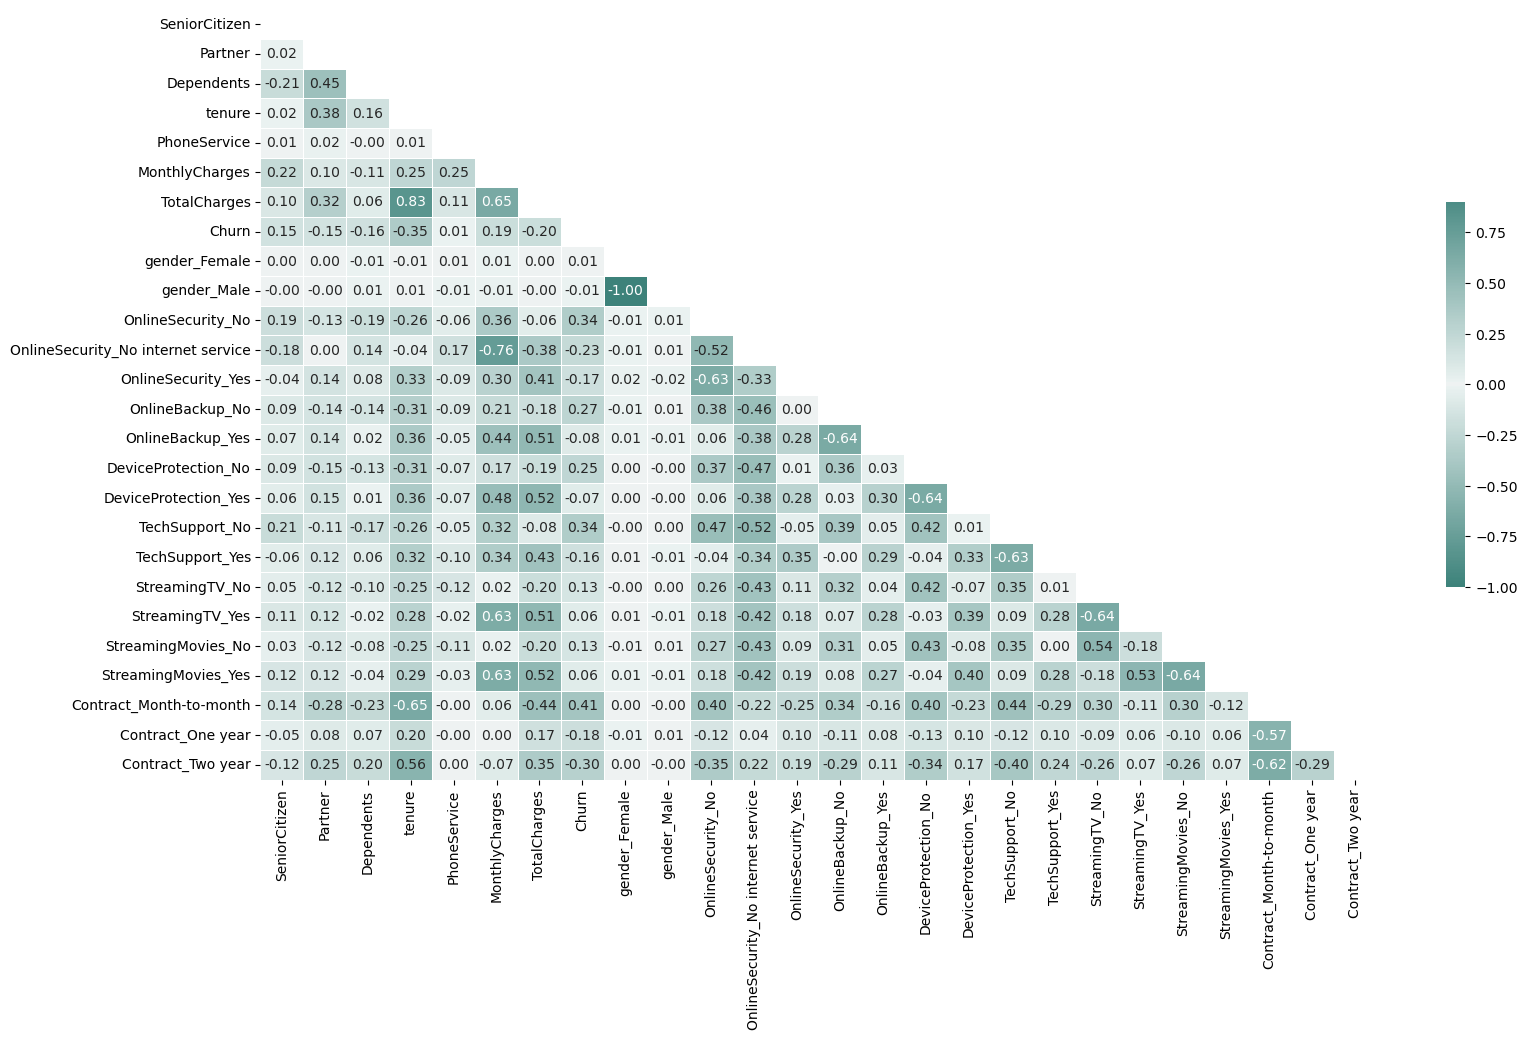

In [115]:
correlations_matrix = encoded_data.corr()
mask = np.zeros_like(correlations_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 180, as_cmap=True)
# 180° = cyan on the hue color wheel, cf https://www.learnui.design/blog/the-hsb-color-system-practicioners-primer.html

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(correlations_matrix, mask=mask, fmt=".2f", cmap=cmap, vmax=.9, center=0,
        linewidths=.5, cbar_kws={"shrink": .5}, annot=True) #square=True, 
# save to file
fig = sns_plot.get_figure()
fig.savefig("features_heatmap.png")

In [117]:
# Select the desired features and the target variable
X = encoded_data.drop('Churn', axis=1)
y = encoded_data['Churn']


In [118]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #test_size=0.3, random_state=42

In [119]:
# all features are numeric, so no need to split into _num and _cat
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)

# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)
X_train_scaled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,gender_Female,gender_Male,OnlineSecurity_No,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,-0.435476,-0.969419,-0.656543,-0.340191,0.32585,-0.514314,-0.460284,0.995467,-0.995467,1.010276,...,1.387334,1.003794,-0.631827,1.223200,-0.787557,1.232411,-0.793564,0.898702,-0.517280,-0.555335
1,2.296336,-0.969419,-0.656543,0.883210,0.32585,0.017840,0.556508,-1.004554,1.004554,1.010276,...,1.387334,-0.996221,1.582712,1.223200,-0.787557,-0.811418,1.260138,-1.112715,1.933189,-0.555335
2,-0.435476,-0.969419,-0.656543,-1.196572,-3.06890,-0.819594,-0.948382,-1.004554,1.004554,1.010276,...,1.387334,1.003794,-0.631827,-0.817528,1.269750,1.232411,-0.793564,0.898702,-0.517280,-0.555335
3,-0.435476,1.031546,-0.656543,1.168670,0.32585,-1.483535,-0.440119,0.995467,-0.995467,-0.989828,...,-0.720807,-0.996221,-0.631827,-0.817528,-0.787557,-0.811418,-0.793564,-1.112715,-0.517280,1.800714
4,-0.435476,-0.969419,-0.656543,-0.829552,0.32585,0.658427,-0.537185,-1.004554,1.004554,1.010276,...,-0.720807,1.003794,-0.631827,-0.817528,1.269750,1.232411,-0.793564,0.898702,-0.517280,-0.555335


## Round 2

• (Optional) Fit a logistic Regression model on the training data.

• Fit a Knn Classifier (NOT KnnRegressor please!)model on the training data.

• Fit a Decision Tree Classifier on the training data.

• Compare the accuracy, precision, recall for the previous models on both the train 
and test sets.

## Round 3

Apply K-fold cross validation on your models built before, and check the model score.

Note: So far we have not balanced the data.


## Round 4

Fit a Random forest Classifier on the data and compare the accuracy. 

Tune the hyper parameters with Gridsearch and check the results. retrain the final model with the best parameters found.

## Managing imbalance in the dataset 

• Check for the imbalance. 

• Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes. 

• Each time fit the model and check the accuracy of the model. 
 